In [1]:
#Allan Abraham
#Dr. Lambert
#Gillespie Algorithm Project

#1) Initialization
#2) Monte Carlo
#3) Update
#4) Iterate

In [2]:
#imports
import numpy as np 
import os.path
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [3]:
def gillespie():
    global t, nAnt, nTox, nNeu, n
  
    #Calculate propensities 
    
    #Toxin production, neutralized, degradation
    w1 = (BetaTox)/(1+(nTox/Thalf)**n)
    w2 = k*nAnt*nTox
    w3 = alphaT*nTox
    
    #Antitoxin production, degradation
    w4 = (BetaAnt)/(1+(nTox/Ahalf)**n)
    w5 = alphaA*nAnt
    
    #total rate
    Rtot = w1+w2+w3+w4+w5
    
    #generate random numbers
    r1 = np.random.rand()
    r2 = np.random.rand()
    
    #Time till next reaction
    dt = (1.0/Rtot)*np.log(float(1.0/r1))
    t += dt 
        
    #which reaction occurs 
    r2 = r2*Rtot
    
    
    #production of toxin
    if r2 < w1:
        nTox += 1
        
    #production of neutralized pair
    elif r2 < (w1+w2) and nTox != 0 and nAnt != 0:
        nTox -= 1
        nAnt -= 1
        nNeu += 1
    
    #degredation of toxin
    elif r2 < (w1+w2+w3) and nTox != 0:
        nTox -= 1
    
    #production of antitoxin
    elif r2 < (w1+w2+w3+w4):
        nAnt += 1
    
    #degredation of antitoxin    
    elif nAnt != 0:
        nAnt -= 1
    
    #update populations
    Time.append(t)
    Antpop.append(nAnt)   
    Toxpop.append(nTox)
    Neupop.append(nNeu)

In [4]:
#Four populations: Toxin, Antitoxin, Toxin-Antitoxin Pair (Neutral), Cell
#Change these input parameters

#initial concentrations 
#toxin
nTox = 00.0 
#antitoxin
nAnt = 00.0
#neutralized pair
nNeu = 0.0

#inital rates

#Rate of neutralized pair formation 
k = 0.0005

#initial time
t = 0

#final time
T = 10080*5

#Scaling factor
#Translation factor 
BetaTox = 1
#Changes how the protein ratio that is produced
BetaAnt = 2

#Concentration when reaction rate is at half
Thalf = 140

Ahalf = 70

#Rate of toxin degradation  
alphaT = np.log(2)/2880 #.0005

#Rate of antitoxin degradation 
alphaA = np.log(2)/60 #0.005

#Hill coefficient - number of particles needed for binding
n = 2.0

#Result arrays
Time = []
Toxpop = []
Antpop = []
Neupop = []


#Beginning
Time.append(t)
Toxpop.append(nTox)
Antpop.append(nAnt)
Neupop.append(nNeu)

In [5]:
#saving initial concentratoins 
intTox = nTox
intAnt = nAnt
intNeu = nNeu

#Running gillespie Algorithm
while t < T:
    gillespie()

Button(description='Save Output?', style=ButtonStyle())

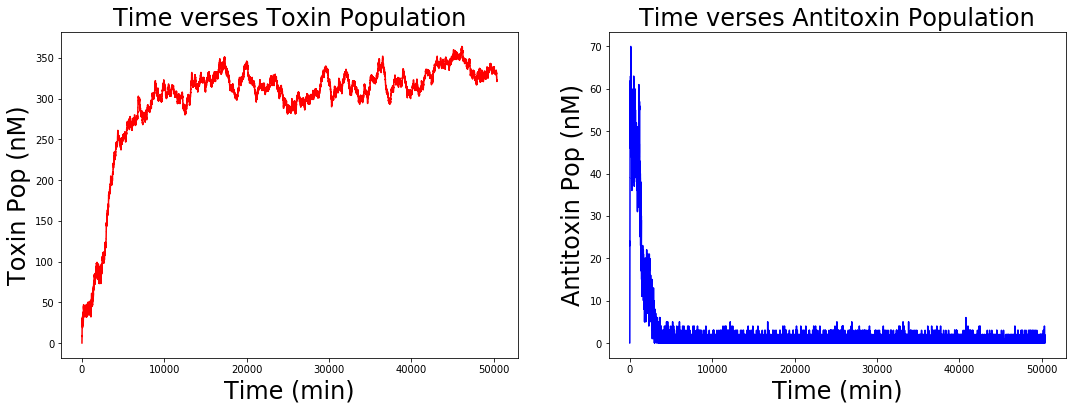

Input file name without file extension


Text(value='')

Test.txt
Test.eps
Creation Succesful


In [6]:
#plotting 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
#ax3
fig.subplots_adjust(wspace=0.2)

ax1.step(Time, Toxpop, 'r')
ax1.set_xlabel('Time (min)', fontsize=24)
ax1.set_ylabel('Toxin Pop (nM)', fontsize=24)
ax1.set_title('Time verses Toxin Population', fontsize=24)

ax2.step(Time, Antpop, 'b')
ax2.set_xlabel('Time (min)', fontsize=24)
ax2.set_ylabel('Antitoxin Pop (nM)', fontsize=24)
ax2.set_title('Time verses Antitoxin Population', fontsize=24)
#Uncomment to add Neutralized Concentration Graph, add ax3 to subplots and change ncols = 3
#ax3.step(Time, Neupop, 'g')
#ax3.set_xlabel('Time (min)', fontsize=24)
#ax3.set_ylabel('Neutral Pop (nM)', fontsize=24)
#ax3.set_title('Time verses Neutral Population', fontsize=24)

Button = widgets.Button(description = "Save Output?")
inText = widgets.Text()
outText = widgets.Text()
TextFile = None
epsFile = None
display(Button)

#TO SAVE DATA 
#Make sure to change name of the files you want to write to as you could lose previously saved data!
def handle_submit(sender):
    global TextFile, epsFile 
    outText.value = inText.value
    TextFile = inText.value +'.txt'
    epsFile = inText.value +'.eps'
    i = len(Time)
    a = 0
    
    if os.path.isfile(TextFile) or os.path.isfile(epsFile):
        print("File Exists. Please choose different name.")
        return
    
    F = open(TextFile, 'w+')
    F.write('Maximum Run Time = ' +str(T)+ '\n\n')
    F.write('Initial Concentrations:\nToxin Concentration = ' +str(intTox)+ '\nAntitoxin Concentratin = ' +str(intAnt)+ '\nNeutralized pair concentration = ' +str(intNeu)+ '\n')
    F.write('\nRate of neutralized pair formation = ' +str(k)+ '\nRate of toxin degradation = ' +str(alphaT)+ '\nRate of Antitoxin Degradation = ' +str(alphaA)+ '\n')
    F.write('\nTranslation Factor of Toxin = ' +str(BetaTox)+ '\nTranslation Factor of Antitoxin = ' +str(BetaAnt)+ '\n')
    F.write('\nToxin Half Maximal Concentration = ' +str(Thalf)+ '\nAntitoxin Half Maximal Concentration = ' +str(Ahalf)+ '\nHill Coefficient = ' +str(n)+'\n')
    F.write('\n Total of ' +str(i)+ ' events Occurred\n')
    F.write('\nTime\t\t\tNumber of Toxin\t\tNumber of Antitoxins\t\tNumber of Neutralized Pairs\n')
    
    while a < i:
        F.write('%-28s %-23s %-10s %24s\n' % (str(Time[a]), str(Toxpop[a]), str(Antpop[a]), str(Neupop[a])))        
        a += 1
        
    #print("Reaction Rate total\tReaction probability\tNum of Pair\tNum of Tox\tNum of Ant")
    #print(Rtot, "\t\t", r2, "\t\t", nNeu, "\t\t", nTox, "\t\t", nAnt)

    
    F.close()
    fig.savefig(epsFile, format='eps', dpi=1000)
    
    print(TextFile)
    print(epsFile)
    print('Creation Succesful')
    
def on_button_clicked(b):
    print('Input file name without file extension')

    display(inText)
    inText.on_submit(handle_submit)
    
Button.on_click(on_button_clicked)
